# **Hand written digets classification using neural network MNIST**

In [ ]:

import numpy as np, sys # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Plotting 

from google.colab import drive,files
import os
np.random.seed(1)


#Mount Gdrive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**What we gonna build**

![alt text](https://drive.google.com/uc?id=1OS6SyupEWIvqyaouIre6-Q2sLQgsu9hf "Logo Title Text 1")

## **Load our dataset**

In [40]:
trainData = pd.read_csv("/content/drive/MyDrive/Machine learning Workshop/code/digit-recognizer/train.csv")
print('The train dataset have',trainData.shape[0],'images.')
print('There are',trainData.shape[1],'columns. 784 for pixels of each images and 1 for label field.')

The train dataset have 42000 images.
There are 785 columns. 784 for pixels of each images and 1 for label field.


**Split the data into Training and testing set**

In [41]:
# We split the data to two sets one we train the model and the other set is gonna be used to test the performace of the model   

# Train dataset:
# X-Axis : Pixels values - each images 28x28 pixels convert into to  28^2 = 784 array. 
x_train = (trainData.iloc[:,1:]).values.astype('float32')
# Y-Axis : Target : Label
y_train = trainData.iloc[:,0].values.astype('int32')
trainData.head()

testData = pd.read_csv("/content/drive/MyDrive/Machine learning Workshop/code/digit-recognizer/test.csv")
print('The test dataset have',testData.shape[0],'images.')
print('There are',testData.shape[1],'columns. 784 for pixels of each images without label.')

# X-Axis : Pixels values
x_test = (testData.iloc[:,0:]).values.astype('float32')
y_test = trainData.iloc[:,0].values.astype('int32')

images, labels = (x_train[0:1000].reshape(1000,28*28) / 255, y_train[0:1000])

The test dataset have 28000 images.
There are 784 columns. 784 for pixels of each images without label.


**Plot the data**

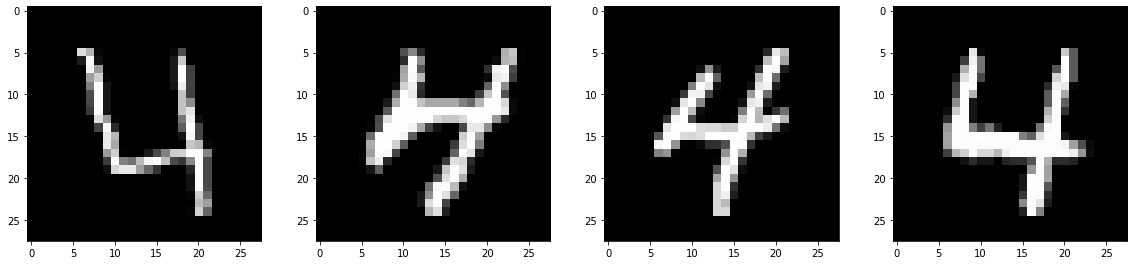

In [44]:
#Not a necessary step, but it`s nice to visualize the data and do a sanity-check

plt.figure(figsize=(25,25))
j=0
for i in range(1,43):
    if(y_train[i] == 4):
      j+=1
      plt.subplot(5,5,j+1) 
      plt.imshow(x_train[i].reshape(28,28),cmap='gray')

plt.show()

**Apply one hot encoding to our label**

In [45]:
one_hot_labels = np.zeros((len(labels),10))
for i,l in enumerate(labels):
  one_hot_labels[i][l] = 1
labels = one_hot_labels

test_images = x_test.reshape(len(x_test),28*28) / 255
test_labels = np.zeros((len(y_test),10))
for i,l in enumerate(y_test):
    test_labels[i][l] = 1

print("labels after encoding then",labels)  

labels after encoding then [[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## **Time to build the model**
 
 **We start by defining our activation function**

In [46]:
def relu(x):
    return (x >= 0) * x # returns x if x > 0

def relu_prime(output):
    return output >= 0 # returns 1 for input > 0

def dropout(layer_shape):
  return np.random.randint(2,size=layer_shape) * 2.

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_prime(x):
    return x*(1-x)  

**Now we define our hyper parameters (neurons ,layer, learning rate, iterations)**

In [86]:
input_neurons = 784   # number of features Features  Aka number of input neurons
hidden_neurons = 100   # number of hidden neurons in our  hidden layer 
output_neruons = 10   # number of labels Aka output neurons 

alpha =   0.001       # Learning rate 
iterations = 100      # Iterations of training 
batch_size = 100      # Batch size 

**Define the model structure**

In [48]:
def predict(image,weights_0_1,weights_1_2):
  layer_input = image
  layer_1 = relu(np.dot(layer_input,weights_0_1))
  layer_output = np.dot(layer_1, weights_1_2)
  return sigmoid(layer_output)

**Define our objective function (What our model should do)**

![alt text](https://drive.google.com/uc?id=1GqJUzZCthmE_S_YKs2LlMRjmY-NAF8oU "Logo Title Text 1")

In [49]:
def calculate_loss_mse(output,labels,batch_start,batch_end):
  return np.sum((labels[batch_start:batch_end] - output) ** 2)

def calculate_loss_cross_entropy(output,labels,batch_start,batch_end):
  return -np.mean ( labels[batch_start:batch_end] * np.log(output) + (1 - labels[batch_start:batch_end]) * np.log(1 - output) )  

**Intialize our weights Input->Hidden->output**

In [93]:
weights_0_1 = 0.2*np.random.random((input_neurons,hidden_neurons)) - 0.1
weights_1_2 = 0.2*np.random.random((hidden_neurons,output_neruons)) - 0.1

print(weights_0_1)

[[-0.02581343  0.05276126 -0.00377432 ... -0.02235895 -0.09569621
   0.01532211]
 [ 0.0911545   0.04392554  0.07236071 ...  0.04073151  0.00852306
  -0.09199009]
 [ 0.03218862  0.07253894  0.08184313 ...  0.09681425 -0.07536562
   0.07340837]
 ...
 [-0.07537007  0.05312219  0.04614382 ...  0.09224743 -0.02703163
  -0.06405528]
 [-0.03013598  0.022704    0.00523573 ... -0.08199545  0.05161903
  -0.06385026]
 [ 0.09217696 -0.04102512 -0.04447047 ...  0.02416874  0.03794661
   0.06590733]]


**Test with random weights**

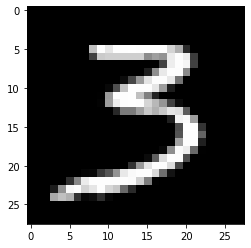

In [117]:
plt.imshow(images[25].reshape(28,28),cmap='gray')
plt.show()

In [118]:
print("predicted label: ",np.argmax(predict(images[25],weights_0_1,weights_1_2)))

predicted label:  3


### **Let's train the Neural network !!**

In [95]:
for j in range(iterations):
    error, correct_cnt = (0.0, 0)
    for i in range(int(len(images) / batch_size)):
        batch_start, batch_end = ((i * batch_size),((i+1)*batch_size))

        # feed forward
        layer_input = images[batch_start:batch_end]
        layer_1 = relu(np.dot(layer_input,weights_0_1))
        dropout_mask = dropout(layer_1.shape) 
        layer_1 *=  dropout_mask   # Dropout
        layer_output = sigmoid(np.dot(layer_1,weights_1_2))

        # loss
        error += calculate_loss_cross_entropy(layer_output,labels,batch_start,batch_end)

        # back propagation
        for k in range(batch_size):
            # acurraccy of the model during the traing 
            correct_cnt += int(np.argmax(layer_output[k:k+1]) == np.argmax(labels[batch_start+k:batch_start+k+1]))
          
            # calculate our derivatives 
            layer_output_delta = sigmoid_prime((labels[batch_start:batch_end]-layer_output)/batch_size)

            #print(layer_output_delta)
            layer_1_delta = layer_output_delta.dot(weights_1_2.T) * relu_prime(layer_1)
            layer_1_delta *= dropout_mask # Dropout

            # update our weights 
            weights_1_2 = weights_1_2 + alpha * layer_1.T.dot(layer_output_delta)
            weights_0_1 = weights_0_1 + alpha * layer_input.T.dot(layer_1_delta)
            
    if(j%10 == 0):

        sys.stdout.write("\n" + \
                         "I:" + str(j) + \
                         " Train-Err:" + str(error/ float(len(images)))[0:5] +\
                         " Train-Acc:" + str(correct_cnt/ float(len(images))))
        
print(weights_0_1)
print(weights_1_2)


I:0 Train-Err:0.004 Train-Acc:0.147
I:10 Train-Err:0.001 Train-Acc:0.77
I:20 Train-Err:0.001 Train-Acc:0.814
I:30 Train-Err:0.000 Train-Acc:0.851
I:40 Train-Err:0.000 Train-Acc:0.868
I:50 Train-Err:0.000 Train-Acc:0.868
I:60 Train-Err:0.000 Train-Acc:0.89
I:70 Train-Err:0.000 Train-Acc:0.886
I:80 Train-Err:0.000 Train-Acc:0.894
I:90 Train-Err:0.000 Train-Acc:0.894[[-0.02581343  0.05276126 -0.00377432 ... -0.02235895 -0.09569621
   0.01532211]
 [ 0.0911545   0.04392554  0.07236071 ...  0.04073151  0.00852306
  -0.09199009]
 [ 0.03218862  0.07253894  0.08184313 ...  0.09681425 -0.07536562
   0.07340837]
 ...
 [-0.07537007  0.05312219  0.04614382 ...  0.09224743 -0.02703163
  -0.06405528]
 [-0.03013598  0.022704    0.00523573 ... -0.08199545  0.05161903
  -0.06385026]
 [ 0.09217696 -0.04102512 -0.04447047 ...  0.02416874  0.03794661
   0.06590733]]
[[-4.58779279e-01 -9.54789661e-02  9.40053145e-02  8.70906361e-02
  -1.65958077e-01 -1.37218996e-01 -2.27303295e-01 -2.82418006e-01
   5.6163

## **Let's Test our trained model** 

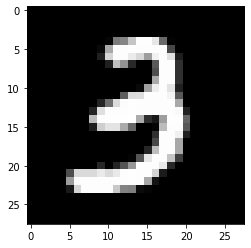

In [116]:
plt.imshow(test_images[7].reshape(28,28),cmap='gray')
plt.show()

In [115]:
output = predict(test_images[7],weights_0_1,weights_1_2)
print("predicted label: ",np.argmax(output))

predicted label:  3
